<a href="https://colab.research.google.com/github/Ensyllis/Notes-and-Projects/blob/main/Credit_Card_Fraud_Logistical_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A Logistical Regression is Capable of Identifying the Probability of a Bernoulli Trial Given the Linear Regression Relationship

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [ ]:
data = pd.read_csv('creditcard.csv')

### Desired Targets

- Predictive Question: What is the Probability that a Client Subscribed to the Term Deposit? (1 = "Yes", 0 = "No")
- Variable y ⊂ {1,0}

In [ ]:
count_no_sub = len(data[data['Class']==0])
count_sub = len(data[data['Class']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no Fraud is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of Fraud", pct_of_sub*100)


percentage of no Fraud is 99.82725143693798
percentage of Fraud 0.1727485630620034


Frequency of Purchase of the Deposit Depends on the Job Title, The Following Indicates the Prediction of Purchases by Job Titles

- We're just Visualizing the Data at this Point

We're Creating a Dummy Variable Now - This Let's Us Predict if a Customer will be a Purchasing the Product or Not

In [ ]:
cat_vars=[]
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=[]
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [ ]:
data_final=data[to_keep]
data_final.columns.values

- Smote Technique
  - Synthetic Minority Oversampling Technique
  1. Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.
  2. Randomly choosing one of the k-nearest neighbors and using it to create a similar, but randomly tweaked, new observations

In [ ]:
X = data_final.loc[:, data_final.columns != 'Class']
y = data_final.loc[:, data_final.columns == 'Class']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Class'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no fraud in oversampled data",len(os_data_y[os_data_y['Class']==0]))
print("Number of fraud",len(os_data_y[os_data_y['Class']==1]))
print("Proportion of no fraud data in oversampled data is ",len(os_data_y[os_data_y['Class']==0])/len(os_data_X))
print("Proportion of fraud data in oversampled data is ",len(os_data_y[os_data_y['Class']==1])/len(os_data_X))

length of oversampled data is  398038
Number of no fraud in oversampled data 199019
Number of fraud 199019
Proportion of no fraud data in oversampled data is  0.5
Proportion of fraud data in oversampled data is  0.5


In [ ]:
data_final_vars=data_final.columns.values.tolist()
y=['Class']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False  True  True False  True  True False False  True  True  True  True
  True  True  True False  True  True  True  True False  True  True False
 False  True False  True  True False]
[10  1  1  2  1  1  3  9  1  1  1  1  1  1  1  7  1  1  1  1  4  1  1  5
  8  1  6  1  1 11]


In [ ]:
cols=['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount'] 
X=os_data_X[cols]
y=os_data_y['Class']

Right Here We're Gaining the P Values of Each of the Variables

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.129675
         Iterations 16
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.813      
Dependent Variable: Class            AIC:              103288.9731
Date:               2022-10-18 03:58 BIC:              103604.9079
No. Observations:   398038           Log-Likelihood:   -51615.    
Df Model:           28               LL-Null:          -2.7590e+05
Df Residuals:       398009           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     16.0000                                       
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
V1       -0.9430     0.0085   -111.3158   0.0000   -0.9596   -0.9264
V2       -2.5675     0.0204   -125.8848   0.

In [ ]:
from sklearn import metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)
print("model score: %.3f" % logreg.score(X_test, y_test))

model score: 0.983


In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[59513   538]
 [ 1526 57835]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     60051
           1       0.99      0.97      0.98     59361

    accuracy                           0.98    119412
   macro avg       0.98      0.98      0.98    119412
weighted avg       0.98      0.98      0.98    119412



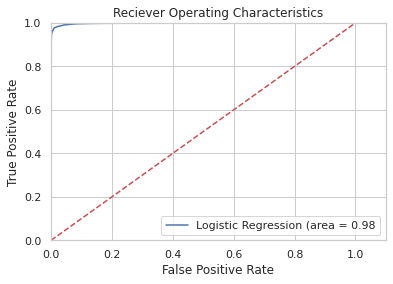

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, threshold = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label ='Logistic Regression (area = %0.2f' %logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.1])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristics')
plt.legend(loc='lower right')
plt.savefig('Loc_ROC')
plt.show()